In [1]:
# Load required packages
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import zipfile
import nltk
import os
import string
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

from transformers import pipeline

In [2]:
# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


In [10]:
cd Desktop/URAP/Topics/Topics_text_csv

C:\Users\yashd\Desktop\URAP\Topics\Topics_text_csv


In [11]:
output_dir = "C:\\Users\\yashd\\Desktop\\URAP\\Deliverables\\"
input_dir = "C:\\Users\\yashd\\Desktop\\URAP\\Topics\\Topics_text_csv\\"
files = os.listdir()
files

['00-11-59-17.csv',
 '00-48-76-89.csv',
 '00-60-29-25.csv',
 '00-64-40-74.csv',
 '00-67-53-14.csv',
 '00-70-88-25.csv',
 '00-90-73-21.csv',
 '01-63-61-97.csv',
 '01-82-19-71.csv',
 '01-83-71-07.csv',
 '02-49-65-32.csv',
 '02-70-09-54.csv',
 '03-63-07-98.csv',
 '03-70-29-70.csv',
 '03-79-80-42.csv',
 '04-29-32-12.csv',
 '04-92-14-52.csv',
 '04-97-01-19.csv',
 '05-09-24-57.csv',
 '05-16-82-49.csv',
 '05-20-84-28.csv',
 '05-26-01-77.csv',
 '05-41-26-33.csv',
 '05-45-69-69.csv',
 '05-57-67-26.csv',
 '05-61-25-86.csv',
 '05-94-46-34.csv',
 '06-28-51-22.csv',
 '06-36-35-87.csv',
 '06-77-00-71.csv',
 '07-18-03-25.csv',
 '07-22-97-54.csv',
 '07-38-74-01.csv',
 '07-83-12-00.csv',
 '07-94-32-57.csv',
 '08-50-89-60.csv',
 '09-30-78-41.csv',
 '09-36-72-72.csv',
 '09-42-91-03.csv',
 '09-67-86-70.csv',
 '09-84-35-71.csv',
 '09-90-33-69.csv',
 '10-00-09-92.csv',
 '10-13-12-66.csv',
 '10-57-46-35.csv',
 '10-81-01-30.csv',
 '10-81-62-31.csv',
 '10-91-63-32.csv',
 '11-08-42-06.csv',
 '11-20-15-59.csv',


In [12]:
# Concatenating sentences from each interview to form a paragraph, storing 
id = np.array([])
full = [''] * len(files)
for i in range(len(files)):
    id = np.append(id, files[i][:-4])
    print(files[i])
    interview = pd.read_csv(input_dir + files[i])
    
    for j in interview['content']:
        full[i] += j + ' '
df = pd.DataFrame()
df['text_id'] = id
df['content'] = full

# Saving new dataframe to be accessed for other tasks as well
df.to_csv(ouput_dir + 'interviews.csv')

00-11-59-17.csv
00-48-76-89.csv
00-60-29-25.csv
00-64-40-74.csv
00-67-53-14.csv
00-70-88-25.csv
00-90-73-21.csv
01-63-61-97.csv
01-82-19-71.csv
01-83-71-07.csv
02-49-65-32.csv
02-70-09-54.csv
03-63-07-98.csv
03-70-29-70.csv
03-79-80-42.csv
04-29-32-12.csv
04-92-14-52.csv
04-97-01-19.csv
05-09-24-57.csv
05-16-82-49.csv
05-20-84-28.csv
05-26-01-77.csv
05-41-26-33.csv
05-45-69-69.csv
05-57-67-26.csv
05-61-25-86.csv
05-94-46-34.csv
06-28-51-22.csv
06-36-35-87.csv
06-77-00-71.csv
07-18-03-25.csv
07-22-97-54.csv
07-38-74-01.csv
07-83-12-00.csv
07-94-32-57.csv
08-50-89-60.csv
09-30-78-41.csv
09-36-72-72.csv
09-42-91-03.csv
09-67-86-70.csv
09-84-35-71.csv
09-90-33-69.csv
10-00-09-92.csv
10-13-12-66.csv
10-57-46-35.csv
10-81-01-30.csv
10-81-62-31.csv
10-91-63-32.csv
11-08-42-06.csv
11-20-15-59.csv
11-42-17-29.csv
11-42-18-76.csv
11-43-85-74.csv
11-56-38-04.csv
11-61-40-11.csv
11-83-22-19.csv
12-36-14-51.csv
12-48-22-29.csv
12-52-12-79.csv
12-87-56-40.csv
13-22-87-59.csv
13-30-79-21.csv
13-32-94

NameError: name 'ouput_dir' is not defined

In [13]:
interview_df = pd.read_csv(output_dir + 'interviews.csv').iloc[: , 1:]
interview_df.head()

,text_id,content
0,00-11-59-17,Samuel good evening. my name is AYUGI LINDA. ...
1,00-48-76-89,"hello, how are you? am fine. May you read me y..."
2,00-60-29-25,good afternoon. how are you? am fine am called...
3,00-64-40-74,How are you Gideon? How are studies going? How...
4,00-67-53-14,hello Allen. How are you? am IBRA and I will b...


In [14]:
# Labels associated with all topics
labels = np.array(['overcome failure', 'self-confidence', 'persistence', 'resilience after failure', 'patience', 'earnings', 'cost/time to start business', 'discrimination', 'contract arrangements', 'practical skills needed', 'application cost', 'unpaid jobs', 'jobs arrival rate', 'wages', 'time to find job', 'vacancies characteristics', 'job search', 'job search timings', 'accessing tools', 'finding suppliers/customers', 'negotiation', 'tips for applications', 'tips for CV writing', 'number of applications', 'tips on application material', 'best locations']) 

In [16]:
# Extending dataframe and initializing counts associated with each label to be 0
for i in range(26):
    interview_df[labels[i]] = pd.DataFrame([0]*504, index=df.index)

In [17]:
interview_df.head()

,text_id,content,overcome failure,self-confidence,persistence,resilience after failure,patience,earnings,cost/time to start business,discrimination,...,job search,job search timings,accessing tools,finding suppliers/customers,negotiation,tips for applications,tips for CV writing,number of applications,tips on application material,best locations
0,00-11-59-17,Samuel good evening. my name is AYUGI LINDA. ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00-48-76-89,"hello, how are you? am fine. May you read me y...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00-60-29-25,good afternoon. how are you? am fine am called...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00-64-40-74,How are you Gideon? How are studies going? How...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00-67-53-14,hello Allen. How are you? am IBRA and I will b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
%%time
# Using zero shot classification to obtain the similarity score and store it in the dataframe
num_interviews = 0
start_ind = 503
end_ind = start_ind + num_interviews
for i in range(start_ind, end_ind):
    print('Interview ', i, ' of', end_ind)
    for j in labels:
        #interview_df[j] = interview_df[j].astype(np.float64)
        interview_df[j][i] = classifier(interview_df['content'][i], j)['scores'][0]

Wall time: 0 ns


In [26]:
interview_df

,Unnamed: 0,text_id,content,overcome failure,self-confidence,persistence,resilience after failure,patience,earnings,cost/time to start business,...,job search,job search timings,accessing tools,finding suppliers/customers,negotiation,tips for applications,tips for CV writing,number of applications,tips on application material,best locations
0,0,00-11-59-17,Samuel good evening. my name is AYUGI LINDA. ...,0.144689,0.288472,0.885838,0.269062,0.363713,0.722128,0.130216,...,0.392900,0.357189,0.948978,0.427290,0.117784,0.545169,0.029997,0.325501,0.477715,0.432324
1,1,00-48-76-89,"hello, how are you? am fine. May you read me y...",0.552005,0.472940,0.761008,0.776517,0.682935,0.773778,0.385469,...,0.989173,0.934798,0.743002,0.493482,0.530296,0.590592,0.098276,0.636923,0.264272,0.593465
2,2,00-60-29-25,good afternoon. how are you? am fine am called...,0.914794,0.606556,0.917180,0.966191,0.457938,0.978862,0.863035,...,0.978986,0.913207,0.876426,0.794230,0.449261,0.892437,0.168769,0.775098,0.598188,0.930996
3,3,00-64-40-74,How are you Gideon? How are studies going? How...,0.634307,0.833639,0.861313,0.826641,0.700066,0.777897,0.859369,...,0.857430,0.860828,0.881102,0.793596,0.694387,0.925527,0.875925,0.820374,0.910053,0.766054
4,4,00-67-53-14,hello Allen. How are you? am IBRA and I will b...,0.299239,0.230784,0.911218,0.494940,0.887700,0.857903,0.272343,...,0.899564,0.633013,0.634740,0.373088,0.201818,0.493929,0.155599,0.469439,0.288206,0.469558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,98-65-25-06,How are you/. I think you are remaining with l...,0.530084,0.431711,0.701885,0.722266,0.546651,0.402545,0.648249,...,0.476056,0.579213,0.673373,0.348312,0.423639,0.530086,0.500744,0.615625,0.566538,0.384940
500,500,99-33-66-89,"Hello, Teddy ow are you. Yea this is fortunate...",0.842988,0.938048,0.979381,0.920197,0.930608,0.925073,0.976377,...,0.947717,0.935636,0.985421,0.933096,0.853263,0.958719,0.925678,0.937543,0.959822,0.947139
501,501,99-41-75-39,"Hello, how are you? Am Julian . You can call m...",0.482465,0.816621,0.770546,0.691770,0.591352,0.481575,0.751843,...,0.912022,0.932135,0.769087,0.531811,0.333585,0.877773,0.192838,0.804352,0.827733,0.830447
502,502,99-50-93-22,Hello winnie. How are you? You are fine? Thats...,0.864494,0.967668,0.953193,0.959195,0.948816,0.924705,0.963915,...,0.904372,0.944109,0.951499,0.969540,0.909398,0.979236,0.963545,0.972897,0.976344,0.940243


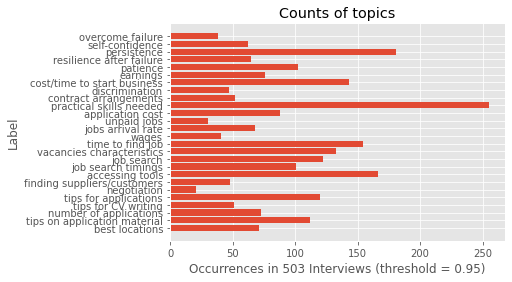

In [27]:
# Plotting the counts based on specified threshold value 
threshold = 0.95
counts = [np.count_nonzero(interview_df[label][:end_ind] > threshold) for label in labels]
plt.style.use('ggplot')
plt.barh(labels[::-1], counts[::-1])
plt.title('Counts of topics')
plt.ylabel('Label')
plt.xlabel(f'Occurrences in {end_ind} Interviews (threshold = {threshold})')
plt.show()

In [28]:
# Storing dataframe
interview_df.to_csv(output_dir + "labels_counts_interviews.csv")